In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
# joblib is replacement of pickle

file_path ="/content/Prediction_Data.xlsx"
sheet_name = "vw_churn_data"

In [5]:
df  = pd.read_excel(file_path,sheet_name=sheet_name)

In [6]:
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [7]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246021
std,16.805110,4.622369,10.59292,31.067808,2267.481294,8.065520,25.405737,854.858841,2856.181082
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,3.000000,8.00000,35.950000,539.950000,0.000000,0.000000,107.085000,833.685000
50%,47.000000,7.000000,17.00000,71.100000,1556.850000,0.000000,0.000000,470.220000,2367.150000
75%,60.000000,11.000000,27.00000,90.450000,4013.900000,0.000000,0.000000,1269.840000,5105.685000
max,84.000000,15.000000,36.00000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               5417 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              4784 non-null   object 
 13  Online_Backup     

In [9]:
print(df.columns)  # Step 1: Check column names
print(df.head())   # Step 2: Preview first few rows
print(df['Customer_Status'].unique())  # Step 3: See unique values
print(df['Customer_Status'].isna().sum())  # Step 4: Count NaNs


Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')
  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka            

In [10]:
# dropping unnecessary columns for prediction

df = df.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

In [11]:
df['Customer_Status'].unique()


array(['Stayed', 'Churned'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# columns to be encoded
col_encode = ['Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines',
'Internet_Service', 'Internet_Type','Online_Security','Online_Backup', 'Device_Protection_Plan',
'Premium_Support', 'Streaming_TV',  'Streaming_Movies','Streaming_Music',
  'Unlimited_Data', 'Contract', 'Paperless_Billing','Payment_Method']

label_encoders = {}  # Dictionary to store encoders for each column

for column in col_encode:  # Loop through each column that needs encoding
    label_encoders[column] = LabelEncoder()  # Create a LabelEncoder for that column
    df[column] = label_encoders[column].fit_transform(df[column])  # Fit & transform the column values

# manually encoding target variables
df['Customer_Status'] = df['Customer_Status'].str.strip().map({'Stayed':0,'Churned':1})


In [13]:
print(df['Customer_Status'].value_counts(dropna=False))


Customer_Status
0    4275
1    1732
Name: count, dtype: int64


In [14]:
# splitting data into features and target
x = df.drop(['Customer_Status'],axis=1)
y= df['Customer_Status']

# Splting into train test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=41)


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,random_state=41)

# training model
rf_model.fit(x_train,y_train)



RandomForestClassifier(random_state=41)

In [18]:
# Evaluating Model by predicting

y_pred = rf_model.predict(x_test)


In [23]:
# model reprot
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



In [29]:
print(confusion_matrix(y_test,y_pred))


[[802  59]
 [116 225]]


<Axes: >

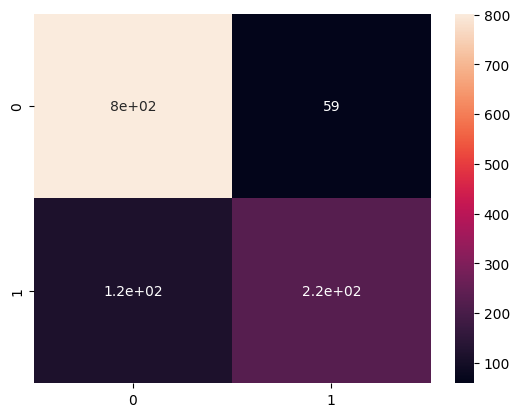

In [32]:
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       861
           1       0.79      0.66      0.72       341

    accuracy                           0.85      1202
   macro avg       0.83      0.80      0.81      1202
weighted avg       0.85      0.85      0.85      1202



In [33]:
#  Features selection for imp features useing feature importance
imp_features = rf_model.feature_importances_
indices = np.argsort(imp_features)[::-1]

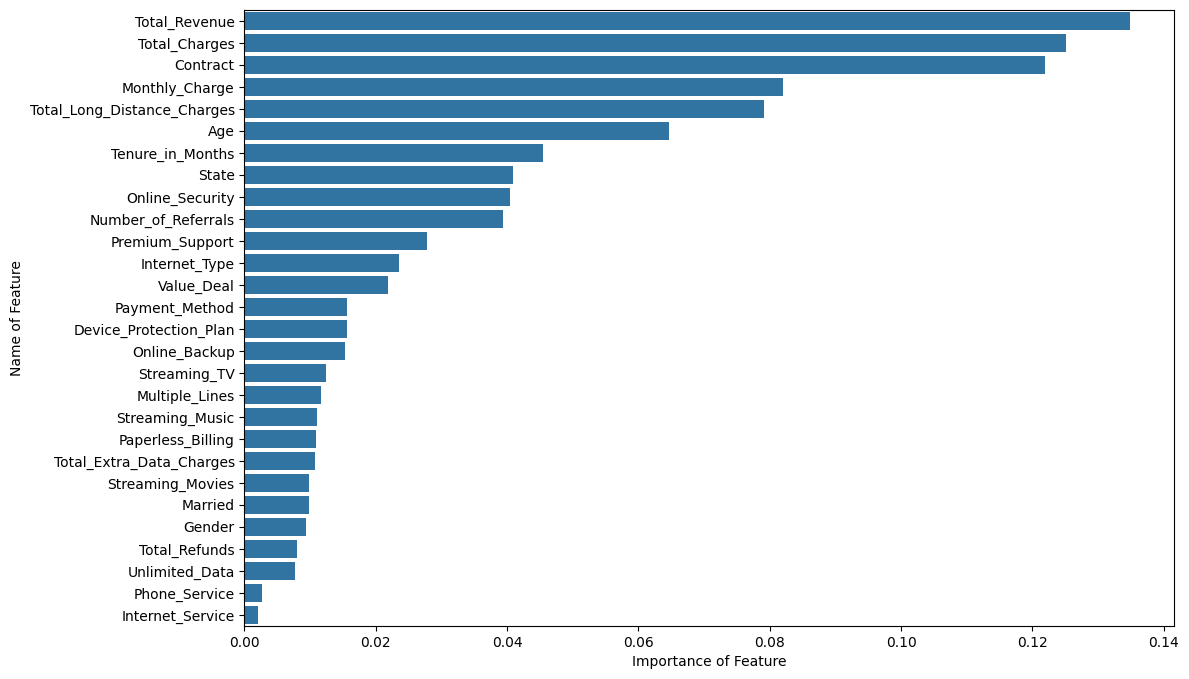

In [36]:
# ploting imp features
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(x=imp_features[indices], y=x.columns[indices])
plt.xlabel("Importance of Feature")
plt.ylabel("Name of Feature")
plt.show()

## Predicting from joiners Data


In [ ]:
# Predict on New Data

# Define the path to the Excel file
file_path = r"/content/Prediction_Data.xlsx"
sheet_name = "vw_join_data"


# Read the data into a DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Preview the data
print(new_data.head())

# Retain a copy of original data
original_data = new_data.copy()

# Retain Customer_ID column separately
customer_ids = new_data['Customer_ID']

# Drop columns not needed for prediction
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

# Encode categorical variables using saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

    # we're preparing new_data (a DataFrame) for
    #  prediction by encoding its categorical columns using the same LabelEncoder objects
    #   that were used during training.

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter rows where prediction is 'Churned' (1)
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save results to CSV
original_data.to_csv("/content/Prediction_Data.xlsx", index=False)
